In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

## Load the data set

In [2]:
bank = pd.read_csv("C:\ExcelR\Data Scientist\Logistic Regression/bankfull.csv",';')
bank.head()

C:\Users\harsh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Shape of the data set
bank.shape

(45211, 17)

In [4]:
bank_1 = bank.dropna()
bank_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank_2=bank_1.drop_duplicates()

In [6]:
bank_2[bank_2.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
bank2=pd.get_dummies(bank_2,columns=['job','marital','education','contact','poutcome','month'])

In [8]:
bank2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [9]:
first_column = bank2.pop('y')
bank2.insert(0, 'y', first_column)
bank2

,y,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,no,58,no,2143,yes,no,5,261,1,-1,...,0,0,0,0,0,0,1,0,0,0
1,no,44,no,29,yes,no,5,151,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,no,33,no,2,yes,yes,5,76,1,-1,...,0,0,0,0,0,0,1,0,0,0
3,no,47,no,1506,yes,no,5,92,1,-1,...,0,0,0,0,0,0,1,0,0,0
4,no,33,no,1,no,no,5,198,1,-1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,51,no,825,no,no,17,977,3,-1,...,0,0,0,0,0,0,0,1,0,0
45207,yes,71,no,1729,no,no,17,456,2,-1,...,0,0,0,0,0,0,0,1,0,0
45208,yes,72,no,5715,no,no,17,1127,5,184,...,0,0,0,0,0,0,0,1,0,0
45209,no,57,no,668,no,no,17,508,4,-1,...,0,0,0,0,0,0,0,1,0,0


In [10]:
bank2['default'] = np.where(bank2['default'].str.contains("yes"), 1, 0)
bank2['housing'] = np.where(bank2['housing'].str.contains("yes"), 1, 0)
bank2['loan'] = np.where(bank2['loan'].str.contains("yes"), 1, 0)
bank2['y'] = np.where(bank2['y'].str.contains("yes"), 1, 0)

In [11]:
# Dividing our data into input and output variables 
X = bank2.iloc[:,1:52]
Y = bank2.iloc[:,0]
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [12]:
#Logistic regression and fit the model
classifier = LogisticRegression(max_iter=200)
classifier.fit(X,Y)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [13]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [14]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [15]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [16]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39013   909]
 [ 3679  1610]]


In [17]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [18]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.64      0.30      0.41      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.64      0.68     45211
weighted avg       0.88      0.90      0.88     45211



In [19]:
# ROC Curve

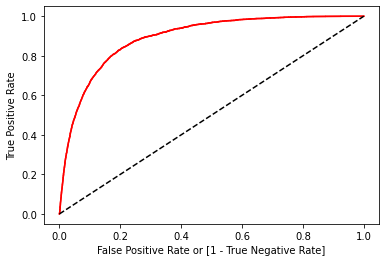

auc accuracy: 0.6408179846522235


In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])
plt.plot(fpr, tpr, color='red')
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)


In [21]:
auc

0.6408179846522235